In [1]:
from pathlib import Path
import io
from pprint import pprint
from PIL import Image
import torch

In [2]:
def load_all_checkpoints(ticker: str):
    """
    Load every checkpoint matching `{ticker}_*.pth` in the current working directory.
    For each checkpoint:
      1) load checkpoint dict (CPU),
      2) print hparams and train/val metrics,
      3) display train plot if present,
    """
    cwd = Path.cwd()
    ckpt_paths = sorted(cwd.glob(f"{ticker}_*.pth"))

    loaded = {}
    for p in ckpt_paths:
        print("Loading checkpoint:", p)
        ckpt = torch.load(p, map_location="cpu", weights_only=False)

        print("\nHyperparameters:")
        pprint(ckpt.get("hparams", {}))

        if "train_plot_png" in ckpt:
            try:
                img = Image.open(io.BytesIO(ckpt["train_plot_png"]))
                display(img)
            except Exception:
                print("  (train_plot_png present but could not display)")

        print("\nTrain metrics:", ckpt.get("train_metrics"))
        print(" Val metrics:", ckpt.get("val_metrics"))
        print('\n------------------------------------------------------------------------------------------------------------------------------\n')

    return loaded


Loading checkpoint: /workspace/my_models/Trading/_Stock_Analysis_/trainings/AAPL_0.22762_fin.pth

Hyperparameters:
{'ATT_DROPOUT': 0.25,
 'ATT_HEADS': 6,
 'CLIPNORM': 3,
 'CLS_LOSS_WEIGHT': 0.05,
 'CONV_DILATION': 1,
 'CONV_K': 3,
 'DROPOUT_LONG': 0.3,
 'DROPOUT_SHORT': 0.25,
 'EARLY_STOP_PATIENCE': 7,
 'ETA_MIN': 1e-06,
 'HUBER_BETA': 0.1,
 'INITIAL_LR': 4e-05,
 'LONG_UNITS': 128,
 'LR_EPOCHS_WARMUP': 3,
 'MAX_EPOCHS': 100,
 'MIN_LR': 1e-06,
 'NUM_WORKERS': 12,
 'PLATEAU_FACTOR': 0.9,
 'PLATEAU_PATIENCE': 0,
 'PLAT_EPOCHS_WARMUP': 999,
 'SHORT_UNITS': 96,
 'SMOOTH_ALPHA': 0.005,
 'SMOOTH_BETA': 20.0,
 'SMOOTH_DELTA': 0.01,
 'SMOOTH_DILATION': 2,
 'SMOOTH_K': 5,
 'TRAIN_BATCH': 64,
 'TRAIN_PREFETCH_FACTOR': 4,
 'T_0': 100,
 'T_MULT': 1,
 'VAL_BATCH': 1,
 'WEIGHT_DECAY': 0.003}


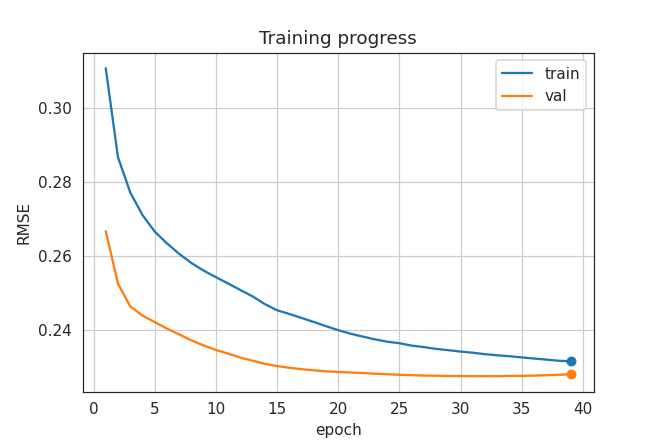


Train metrics: {'rmse': 0.23325538635253906, 'mae': 0.1842246949672699, 'r2': 0.3551526665687561, 'acc': 0.7613595724105835, 'prec': 0.6490614414215088, 'rec': 0.2990173101425171, 'f1': 0.4094187319278717, 'auroc': 0.7466535568237305}
 Val metrics: {'rmse': 0.22762249410152435, 'mae': 0.17373140156269073, 'r2': 0.37102997303009033, 'acc': 0.7543585896492004, 'prec': 0.6819623708724976, 'rec': 0.2717042863368988, 'f1': 0.3885888159275055, 'auc': 0.7495342493057251, 't_acc': 0.2849295735359192, 't_prec': 0.330856055021286, 't_rec': 0.2849295735359192, 't_f1': 0.0024441112764179707, 't_auc': 0.2515832483768463}

------------------------------------------------------------------------------------------------------------------------------

Loading checkpoint: /workspace/my_models/Trading/_Stock_Analysis_/trainings/AAPL_0.23322_fin.pth

Hyperparameters:
{'ATT_DROPOUT': 0.25,
 'ATT_HEADS': 6,
 'CLIPNORM': 3,
 'CLS_LOSS_WEIGHT': 0.05,
 'CONV_DILATION': 1,
 'CONV_K': 3,
 'DIFF1_WEIGHT': 1.0,
 

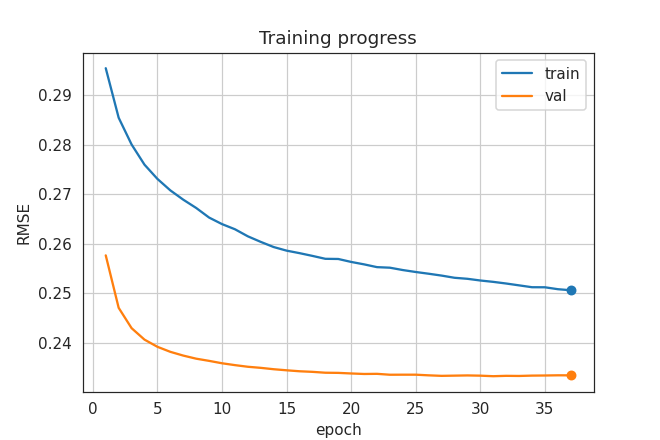


Train metrics: {'rmse': 0.2522689998149872, 'mae': 0.21392886340618134, 'r2': 0.2457396388053894, 'acc': 0.7584320902824402, 'prec': 0.6331968903541565, 'rec': 0.30129873752593994, 'f1': 0.40830886363983154, 'auc': 0.7388730049133301, 't_acc': 0.0, 't_prec': 0.0, 't_rec': 0.0, 't_f1': 0.0, 't_auc': nan}
 Val metrics: {'rmse': 0.23322468996047974, 'mae': 0.18759207427501678, 'r2': 0.33968883752822876, 'acc': 0.7546921968460083, 'prec': 0.6822492480278015, 'rec': 0.27356433868408203, 'f1': 0.3905344605445862, 'auc': 0.7445683479309082, 't_acc': 0.4184397757053375, 't_prec': 0.3335675597190857, 't_rec': 0.4184397757053375, 't_f1': 0.3267304599285126, 't_auc': 0.6237778663635254}

------------------------------------------------------------------------------------------------------------------------------



{}

In [3]:
load_all_checkpoints("AAPL")